<a href="https://colab.research.google.com/github/Shaheer99Ahmed/DM_Stanford_dog/blob/main/Ahmed_Programming3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Banner ID: 916399205*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


### Reading Association data

In [8]:
dataset = []

with open("/content/drive/MyDrive/Programming/Grocery_Items_61.csv", "r") as file_:
    csv_reader = csv.reader(file_)

    next(csv_reader)

    for row in csv_reader:
        row = list(filter(lambda x: x != '', row))
        dataset.append(row)

# Q1(c)

In [9]:
encoder = TransactionEncoder()
encoder_ary = encoder.fit(dataset).transform(dataset)
df = pd.DataFrame(encoder_ary, columns=encoder.columns_)
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [10]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(other vegetables),0.155875,0.122500,0.015625,0.100241,0.818290,-0.003470,0.975261,-0.208275
1,(other vegetables),(whole milk),0.122500,0.155875,0.015625,0.127551,0.818290,-0.003470,0.967535,-0.201954
2,(rolls/buns),(whole milk),0.107625,0.155875,0.013500,0.125436,0.804719,-0.003276,0.965195,-0.213798
3,(soda),(whole milk),0.097375,0.155875,0.011250,0.115533,0.741188,-0.003928,0.954388,-0.278944
4,(yogurt),(whole milk),0.086250,0.155875,0.010125,0.117391,0.753112,-0.003319,0.956398,-0.264039


# Q1(d)

In [11]:
msv = [0.001, 0.005, 0.01]
mcv = [0.05, 0.075, 0.1]
h_map = []
for min_confidence in mcv:
  temp = []
  for min_support in msv:
    encoder = TransactionEncoder()
    encoder_ary = encoder.fit(dataset).transform(dataset)
    df = pd.DataFrame(encoder_ary, columns=encoder.columns_)
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    temp.append(len(assoc_rules))
  h_map.append(temp)

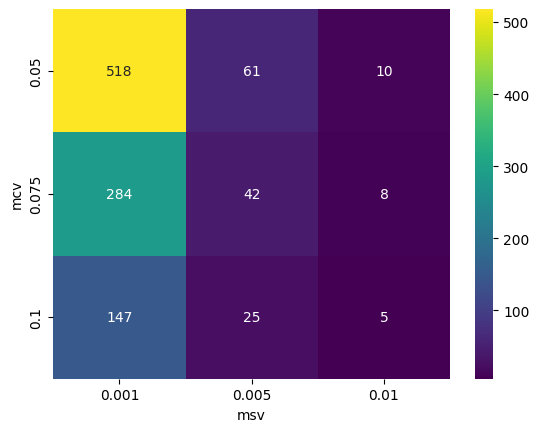

In [12]:
sns.heatmap(h_map, annot=True,fmt='d',cmap='viridis')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=msv)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=mcv)
plt.xlabel("msv")
plt.ylabel("mcv")
plt.show()

# Q1(e)

In [13]:
split_pt = len(dataset) // 2

dataset1 = dataset[:split_pt]
dataset2 = dataset[split_pt:]

In [16]:
encoder1 = TransactionEncoder()
encoder_ary1 = encoder1.fit(dataset1).transform(dataset1)
df1 = pd.DataFrame(encoder_ary1, columns=encoder1.columns_)
frequent_itemsets1 = fpgrowth(df1, min_support=0.005, use_colnames=True)
rules_dataset1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.075)

In [17]:
rules_dataset1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(shopping bags),(soda),0.04900,0.10150,0.00500,0.102041,1.005328,0.000026,1.000602,0.005573
1,(shopping bags),(whole milk),0.04900,0.16100,0.00725,0.147959,0.919001,-0.000639,0.984695,-0.084818
2,(shopping bags),(other vegetables),0.04900,0.12300,0.00600,0.122449,0.995520,-0.000027,0.999372,-0.004710
3,(tropical fruit),(whole milk),0.06350,0.16100,0.00800,0.125984,0.782511,-0.002223,0.959937,-0.228861
4,(tropical fruit),(rolls/buns),0.06350,0.10250,0.00550,0.086614,0.845016,-0.001009,0.982608,-0.163771
5,(tropical fruit),(other vegetables),0.06350,0.12300,0.00700,0.110236,0.896229,-0.000810,0.985655,-0.110033
6,(bottled water),(whole milk),0.06500,0.16100,0.00825,0.126923,0.788342,-0.002215,0.960969,-0.223090
7,(bottled water),(other vegetables),0.06500,0.12300,0.00700,0.107692,0.875547,-0.000995,0.982845,-0.131963
8,(bottled water),(soda),0.06500,0.10150,0.00575,0.088462,0.871542,-0.000848,0.985696,-0.136172
9,(pip fruit),(whole milk),0.05600,0.16100,0.00750,0.133929,0.831854,-0.001516,0.968742,-0.176361


In [18]:
encoder2 = TransactionEncoder()
encoder_ary2 = encoder2.fit(dataset2).transform(dataset2)
df2 = pd.DataFrame(encoder_ary2, columns=encoder2.columns_)
frequent_itemsets2 = fpgrowth(df2, min_support=0.005, use_colnames=True)
rules_dataset2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.075)

In [19]:
rules_dataset2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(other vegetables),0.15075,0.12200,0.01450,0.096186,0.788408,-0.003891,0.971439,-0.240133
1,(other vegetables),(whole milk),0.12200,0.15075,0.01450,0.118852,0.788408,-0.003891,0.963800,-0.234110
2,(rolls/buns),(other vegetables),0.11275,0.12200,0.01100,0.097561,0.799680,-0.002756,0.972919,-0.220171
3,(other vegetables),(rolls/buns),0.12200,0.11275,0.01100,0.090164,0.799680,-0.002756,0.975176,-0.221976
4,(rolls/buns),(whole milk),0.11275,0.15075,0.01300,0.115299,0.764838,-0.003997,0.959929,-0.257355
5,(whole milk),(rolls/buns),0.15075,0.11275,0.01300,0.086235,0.764838,-0.003997,0.970983,-0.265810
6,(root vegetables),(rolls/buns),0.07075,0.11275,0.00625,0.088339,0.783496,-0.001727,0.973224,-0.229209
7,(root vegetables),(other vegetables),0.07075,0.12200,0.00550,0.077739,0.637201,-0.003131,0.952008,-0.379927
8,(pastry),(whole milk),0.05150,0.15075,0.00500,0.097087,0.644029,-0.002764,0.940567,-0.368183
9,(yogurt),(whole milk),0.08600,0.15075,0.00925,0.107558,0.713487,-0.003714,0.951603,-0.305243


In [20]:
pd.merge(rules_dataset1, rules_dataset2, on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(shopping bags),(whole milk),0.04900,0.16100,0.00725,0.147959,0.919001,-0.000639,0.984695,-0.084818,0.04450,0.15075,0.00550,0.123596,0.819871,-0.001208,0.969016,-0.186950
1,(tropical fruit),(whole milk),0.06350,0.16100,0.00800,0.125984,0.782511,-0.002223,0.959937,-0.228861,0.07325,0.15075,0.00900,0.122867,0.815037,-0.002042,0.968211,-0.196706
2,(tropical fruit),(other vegetables),0.06350,0.12300,0.00700,0.110236,0.896229,-0.000810,0.985655,-0.110033,0.07325,0.12200,0.00600,0.081911,0.671404,-0.002936,0.956335,-0.345593
3,(bottled water),(whole milk),0.06500,0.16100,0.00825,0.126923,0.788342,-0.002215,0.960969,-0.223090,0.06450,0.15075,0.00800,0.124031,0.822760,-0.001723,0.969498,-0.187173
4,(bottled water),(soda),0.06500,0.10150,0.00575,0.088462,0.871542,-0.000848,0.985696,-0.136172,0.06450,0.09325,0.00550,0.085271,0.914438,-0.000515,0.991278,-0.090925
5,(pip fruit),(whole milk),0.05600,0.16100,0.00750,0.133929,0.831854,-0.001516,0.968742,-0.176361,0.04600,0.15075,0.00550,0.119565,0.793136,-0.001435,0.964580,-0.214697
6,(pip fruit),(rolls/buns),0.05600,0.10250,0.00650,0.116071,1.132404,0.000760,1.015354,0.123859,0.04600,0.11275,0.00500,0.108696,0.964041,-0.000187,0.995451,-0.037627
7,(whole milk),(other vegetables),0.16100,0.12300,0.01675,0.104037,0.845831,-0.003053,0.978835,-0.178473,0.15075,0.12200,0.01450,0.096186,0.788408,-0.003891,0.971439,-0.240133
8,(other vegetables),(whole milk),0.12300,0.16100,0.01675,0.136179,0.845831,-0.003053,0.971266,-0.172070,0.12200,0.15075,0.01450,0.118852,0.788408,-0.003891,0.963800,-0.234110
9,(rolls/buns),(whole milk),0.10250,0.16100,0.01400,0.136585,0.848356,-0.002502,0.971723,-0.166086,0.11275,0.15075,0.01300,0.115299,0.764838,-0.003997,0.959929,-0.257355


# Q2 Create and compile CNN_model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
CNN_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])



In [23]:
CNN_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [24]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Reading Image Data

In [25]:
path = "/content/drive/MyDrive/Programming/processed"

In [26]:
batch_size = 8
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=100
)

# Define the validation dataset
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 677 files belonging to 4 classes.
Using 542 files for training.
Found 677 files belonging to 4 classes.
Using 135 files for validation.


### Train CNN_model

In [27]:
history = CNN_model.fit(dataset,validation_data=val_data,epochs=20)

Epoch 1/20
68/68 [==============================] - 15s 202ms/step - loss: 127.8920 - accuracy: 0.2657 - val_loss: 1.3869 - val_accuracy: 0.2889
Epoch 2/20
68/68 [==============================] - 15s 213ms/step - loss: 1.3849 - accuracy: 0.2823 - val_loss: 1.3868 - val_accuracy: 0.2889
Epoch 3/20
68/68 [==============================] - 13s 192ms/step - loss: 1.3850 - accuracy: 0.2823 - val_loss: 1.3865 - val_accuracy: 0.2889
Epoch 4/20
68/68 [==============================] - 14s 203ms/step - loss: 1.3845 - accuracy: 0.2823 - val_loss: 1.3863 - val_accuracy: 0.2889
Epoch 5/20
68/68 [==============================] - 13s 192ms/step - loss: 1.3853 - accuracy: 0.2823 - val_loss: 1.3865 - val_accuracy: 0.2889
Epoch 6/20
68/68 [==============================] - 13s 192ms/step - loss: 1.3839 - accuracy: 0.2823 - val_loss: 1.3862 - val_accuracy: 0.2889
Epoch 7/20
68/68 [==============================] - 13s 192ms/step - loss: 1.3830 - accuracy: 0.2823 - val_loss: 1.3863 - val_accuracy: 0.28

# Q2(a)

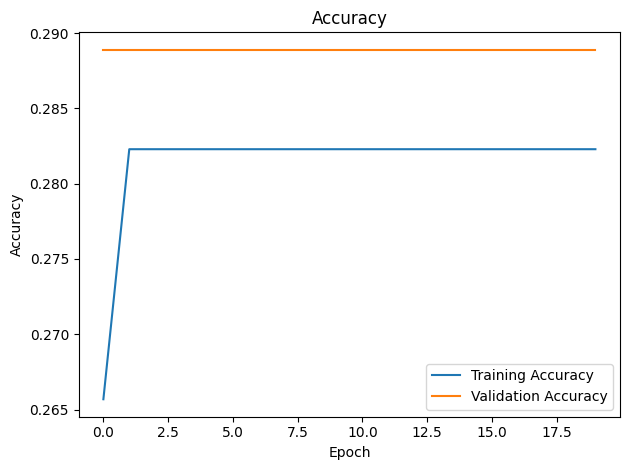

In [28]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## 2(b) Filters changes to 4 and 16

In [29]:
model1 = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])




### Compile new models

In [30]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [31]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 4)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64516)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                1032272   
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1032452 (3.94 MB)
Trainable params: 1032452 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [32]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 258064)            0         
                                                                 
 dense_4 (Dense)             (None, 16)                4129040   
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 4129556 (15.75 MB)
Trainable params: 4129556 (15.75 MB)
Non-trainable params: 0 (0.00 Byte)
______________

### Train new CNN_model 1

In [33]:
new_history1 = model1.fit(dataset,validation_data=val_data,epochs=20)

Epoch 1/20
68/68 [==============================] - 14s 184ms/step - loss: 40.9357 - accuracy: 0.2528 - val_loss: 1.3756 - val_accuracy: 0.2667
Epoch 2/20
68/68 [==============================] - 14s 199ms/step - loss: 1.3907 - accuracy: 0.2509 - val_loss: 1.3861 - val_accuracy: 0.2667
Epoch 3/20
68/68 [==============================] - 13s 183ms/step - loss: 1.3806 - accuracy: 0.2528 - val_loss: 1.3860 - val_accuracy: 0.2889
Epoch 4/20
68/68 [==============================] - 13s 183ms/step - loss: 1.3800 - accuracy: 0.2860 - val_loss: 1.3861 - val_accuracy: 0.2889
Epoch 5/20
68/68 [==============================] - 13s 183ms/step - loss: 1.3795 - accuracy: 0.2860 - val_loss: 1.3861 - val_accuracy: 0.2889
Epoch 6/20
68/68 [==============================] - 13s 183ms/step - loss: 1.3790 - accuracy: 0.2860 - val_loss: 1.3860 - val_accuracy: 0.2889
Epoch 7/20
68/68 [==============================] - 13s 182ms/step - loss: 1.3786 - accuracy: 0.2860 - val_loss: 1.3862 - val_accuracy: 0.288

### Train New CNN_model 2

In [34]:
new_history2 = model2.fit(dataset,validation_data=val_data,epochs=20)

Epoch 1/20
68/68 [==============================] - 17s 238ms/step - loss: 206.7321 - accuracy: 0.2491 - val_loss: 1.3874 - val_accuracy: 0.1778
Epoch 2/20
68/68 [==============================] - 18s 255ms/step - loss: 1.3857 - accuracy: 0.2399 - val_loss: 1.3871 - val_accuracy: 0.2889
Epoch 3/20
68/68 [==============================] - 17s 250ms/step - loss: 1.3853 - accuracy: 0.2823 - val_loss: 1.3868 - val_accuracy: 0.2889
Epoch 4/20
68/68 [==============================] - 18s 264ms/step - loss: 1.3849 - accuracy: 0.2823 - val_loss: 1.3867 - val_accuracy: 0.2889
Epoch 5/20
68/68 [==============================] - 18s 261ms/step - loss: 1.3845 - accuracy: 0.2823 - val_loss: 1.3867 - val_accuracy: 0.2889
Epoch 6/20
68/68 [==============================] - 17s 242ms/step - loss: 1.3841 - accuracy: 0.2823 - val_loss: 1.3864 - val_accuracy: 0.2889
Epoch 7/20
68/68 [==============================] - 18s 259ms/step - loss: 1.3838 - accuracy: 0.2823 - val_loss: 1.3863 - val_accuracy: 0.28

### Plotting Learning Curves

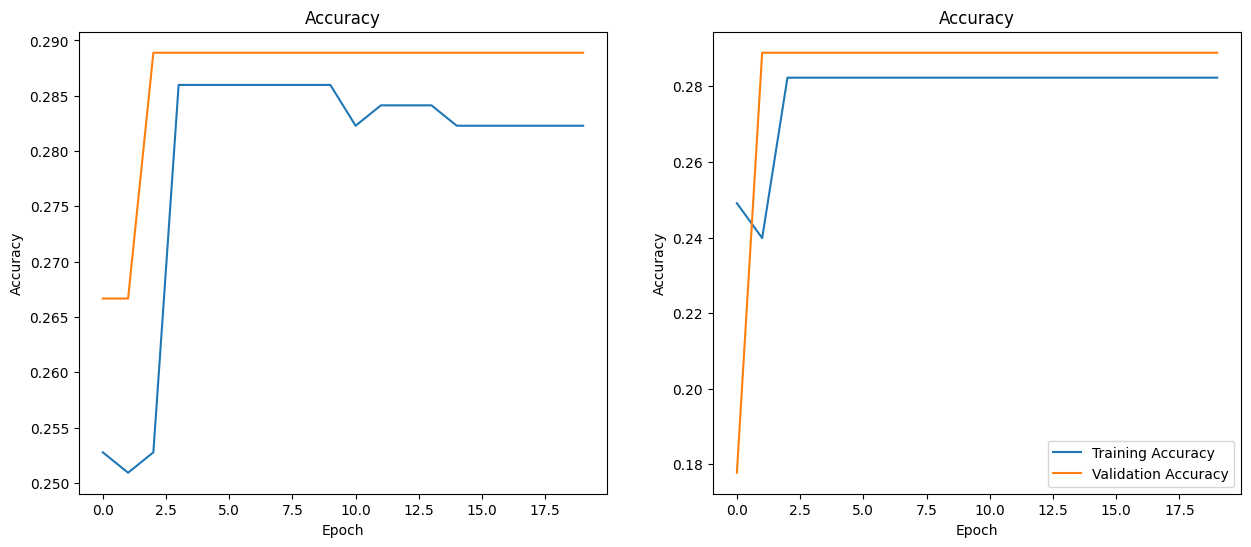

In [35]:

training_accuracy1 = new_history1.history['accuracy']
validation_accuracy1 = new_history1.history['val_accuracy']

training_accuracy2 = new_history2.history['accuracy']
validation_accuracy2 = new_history2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(15,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


### Compairing the models

1. The initial CNN_model appears to suffer from underfitting, as persistently low  accuracies across both training and validation sets.

2. In the  experiment CNN_model 1 with four filters is underfitting. Both training and validation accuracies are strikingly low.

3. In the  experiment CNN_model 1 with sixteen filters, is underfitting. Both training and validation accuracies are strikingly low.